<a href="https://colab.research.google.com/github/ciepielajan/SDA_SMOG_Wawelski/blob/main/Jan/SDA_2021_04_14_Projekt_koncowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 Załadowanie plików







In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [3]:
!gdown --id "186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4"

Downloading...
From: https://drive.google.com/uc?id=186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4
To: /content/archive.zip
2.39MB [00:00, 11.2MB/s]


In [4]:
!unzip -q "archive.zip" -d data/

In [5]:
all_file_names = glob.glob("data/*2017.csv")
all_file_names = sorted(all_file_names)
for counter, file in enumerate(all_file_names):
    print(counter, file)

0 data/april-2017.csv
1 data/august-2017.csv
2 data/december-2017.csv
3 data/february-2017.csv
4 data/january-2017.csv
5 data/july-2017.csv
6 data/june-2017.csv
7 data/march-2017.csv
8 data/may-2017.csv
9 data/november-2017.csv
10 data/october-2017.csv
11 data/september-2017.csv


In [6]:
jan = pd.read_csv(all_file_names[4])
feb = pd.read_csv(all_file_names[3])
mar = pd.read_csv(all_file_names[7])
apr = pd.read_csv(all_file_names[0])
may = pd.read_csv(all_file_names[8])
jun = pd.read_csv(all_file_names[6])
jul = pd.read_csv(all_file_names[5])
aug = pd.read_csv(all_file_names[1])
sep = pd.read_csv(all_file_names[11])
octo = pd.read_csv(all_file_names[10])
nov = pd.read_csv(all_file_names[9])
dec = pd.read_csv(all_file_names[2])

In [7]:
dec.head(1)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-12-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0,96,100542,39,38,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.0,70.0,100479.0,25.0,23.0,40.0,0.0,72.0,100527.0,29.0,28.0,48.0,0,96,100531,...,100616.0,27.0,25.0,41.0,0.0,97.0,100602.0,25.0,21.0,35.0,0,97,100810,34,33,62,5.0,97.0,100036.0,12.0,10.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,0,88,100554,32,33,74,0,94,100607,34,36,66


In [8]:
sensors = pd.read_csv("data/sensor_locations.csv")

In [9]:
sensors[:3]

,id,latitude,longitude
0,3,50.057748,19.961375
1,140,50.057747,19.961374
2,142,50.084816,19.878066


2 Połączenie wszystkich df


In [10]:
year = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])

In [11]:
year.shape

(8593, 337)

In [12]:
year.head(2)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3 Transformacja df







In [13]:
year["UTC time"] = pd.to_datetime(year["UTC time"], format="%Y-%m-%dT%H:%M:%S")
year[:3]

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,66.0,102149.0,110.0,121.0,189.0,-4.0,55.0,102375.0,187.0,212.0,333.0,0.0,49.0,102558.0,108.0,125.0,201.0,1.0,24.0,102244.0,108.0,127.0,203.0,1.0,27.0,102310.0,...,102119.0,138.0,160.0,237.0,0.0,49.0,101536.0,97.0,105.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
year = year.set_index("UTC time")
year[:3]

,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,147.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,129.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,66.0,102149.0,110.0,121.0,189.0,-4.0,55.0,102375.0,187.0,212.0,333.0,0.0,49.0,102558.0,108.0,125.0,201.0,1.0,24.0,102244.0,108.0,127.0,203.0,1.0,27.0,102310.0,134.0,...,102119.0,138.0,160.0,237.0,0.0,49.0,101536.0,97.0,105.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
year.index[:3]

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00'],
              dtype='datetime64[ns]', name='UTC time', freq=None)

In [16]:
year.describe()

,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
count,206.000000,206.000000,1178.000000,1235.000000,1235.000000,1235.000000,6506.000000,6506.000000,6683.000000,6631.000000,6631.00000,6631.000000,2066.000000,2065.000000,2041.000000,1990.000000,1990.000000,1990.000000,2301.000000,2299.000000,7940.000000,7965.000000,7965.000000,7965.000000,8262.000000,8260.000000,8237.000000,8261.000000,8262.000000,8262.000000,8460.000000,8459.000000,8435.000000,8460.000000,8460.000000,8460.000000,8514.000000,8512.000000,8489.000000,8514.000000,...,8504.000000,8529.000000,8529.000000,8529.000000,8423.000000,8422.000000,8398.000000,8423.000000,8423.000000,8423.000000,5315.000000,5315.000000,5579.000000,5579.000000,5579.000000,5579.000000,2783.000000,2783.000000,3031.000000,3031.000000,3031.000000,3031.000000,1098.000000,1098.000000,1147.000000,1147.000000,1147.000000,1147.000000,2647.000000,2647.000000,2653.000000,2653.000000,2653.000000,2653.000000,5443.000000,5443.000000,6337.000000,6337.000000,6337.000000,6337.000000
mean,-5.131068,74.718447,101652.880306,70.830769,75.454251,112.540891,11.464494,80.271288,101639.084842,26.537023,24.39255,42.553009,-0.228461,75.006295,101842.108770,61.021106,63.125628,99.061307,0.924815,70.661592,101664.201134,37.579535,37.139736,58.877087,8.706609,73.132203,101658.786937,25.530686,25.382595,40.737110,9.358038,60.608228,101671.404624,29.105201,29.978132,47.410165,9.145525,74.723919,101691.013194,31.125558,...,101721.064087,31.142455,32.030836,50.626568,8.844948,77.651983,101618.441653,26.555978,25.723139,41.932091,10.175353,76.673754,101866.640796,27.815021,27.088546,46.563183,12.186130,73.675171,101710.759155,23.226658,21.977895,38.554602,8.584699,76.359745,101416.014821,26.715780,28.390584,48.731473,6.672459,78.817907,101591.979269,29.469280,31.978892,65.852997,10.660665,79.759691,101660.566672,23.879754,23.922519,41.092788
std,2.174645,9.939247,1020.704947,54.853035,66.299222,89.265573,7.630920,17.167440,653.937345,19.283222,20.58799,33.386057,6.668424,15.303691,981.352176,45.378344,53.149743,77.221680,6.895178,18.318723,754.000746,41.575301,46.899844,69.629691,9.254376,17.668798,804.643314,27.139991,31.205982,45.711663,8.044169,22.108205,777.964840,30.164063,36.173922,53.403895,8.344350,22.269863,779.843959,32.937612,...,750.742034,34.347888,39.893901,57.325363,8.245934,17.943018,739.888230,28.900511,30.890543,45.531982,7.386840,18.423173,693.095829,19.349817,22.938966,35.943704,7.468062,17.481204,771.419980,16.846201,20.193695,33.343312,8.673697,20.176633,1035.408223,20.147695,27.228703,43.044756,5.581764,11.851727,809.559197,21.697085,27.709362,56.194746,7.864320,19.397843,649.831280,16.803287,20.897541,32.908029
min,-9.000000,38.000000,99160.000000,2.000000,0.000000,3.000000,-6.000000,21.000000,98374.000000,0.000000,0.00000,0.000000,-22.000000,24.000000,99364.000000,1.000000,0.000000,0.000000,-17.000000,19.000000,98309.000000,0.000000,0.000000,0.000000,-17.000000,2.000000,98304.000000,0.000000,0.000000,0.000000,-11.000000,2.000000,98326.000000,0.000000,0.000000,0.000000,-13.000000,14.000000,98349.000000,0.000000,...,98452.000000,0.000000,0.000000,0.000000,-14.000000,23.00

In [17]:
year.isnull().sum().to_frame().T

,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,8387,8387,7415,7358,7358,7358,2087,2087,1910,1962,1962,1962,6527,6528,6552,6603,6603,6603,6292,6294,653,628,628,628,331,333,356,332,331,331,133,134,158,133,133,133,79,81,104,79,...,89,64,64,64,170,171,195,170,170,170,3278,3278,3014,3014,3014,3014,5810,5810,5562,5562,5562,5562,7495,7495,7446,7446,7446,7446,5946,5946,5940,5940,5940,5940,3150,3150,2256,2256,2256,2256


In [18]:
columns_pm10 = [ i  for i in year.columns if  i.split("_")[1] == "pm10"]
print(columns_pm10)

['3_pm10', '140_pm10', '142_pm10', '147_pm10', '169_pm10', '170_pm10', '171_pm10', '172_pm10', '173_pm10', '174_pm10', '176_pm10', '177_pm10', '178_pm10', '179_pm10', '180_pm10', '181_pm10', '182_pm10', '183_pm10', '184_pm10', '185_pm10', '187_pm10', '189_pm10', '192_pm10', '194_pm10', '195_pm10', '196_pm10', '201_pm10', '202_pm10', '203_pm10', '204_pm10', '205_pm10', '208_pm10', '209_pm10', '210_pm10', '211_pm10', '212_pm10', '213_pm10', '214_pm10', '215_pm10', '216_pm10', '218_pm10', '219_pm10', '220_pm10', '221_pm10', '222_pm10', '223_pm10', '225_pm10', '226_pm10', '227_pm10', '228_pm10', '263_pm10', '622_pm10', '713_pm10', '808_pm10', '857_pm10', '895_pm10']


In [19]:
from matplotlib import pyplot as plt

In [20]:
d1 = pd.date_range("2017-01-01", "2017-03-31", freq="W-MON")
d1

DatetimeIndex(['2017-01-02', '2017-01-09', '2017-01-16', '2017-01-23',
               '2017-01-30', '2017-02-06', '2017-02-13', '2017-02-20',
               '2017-02-27', '2017-03-06', '2017-03-13', '2017-03-20',
               '2017-03-27'],
              dtype='datetime64[ns]', freq='W-MON')

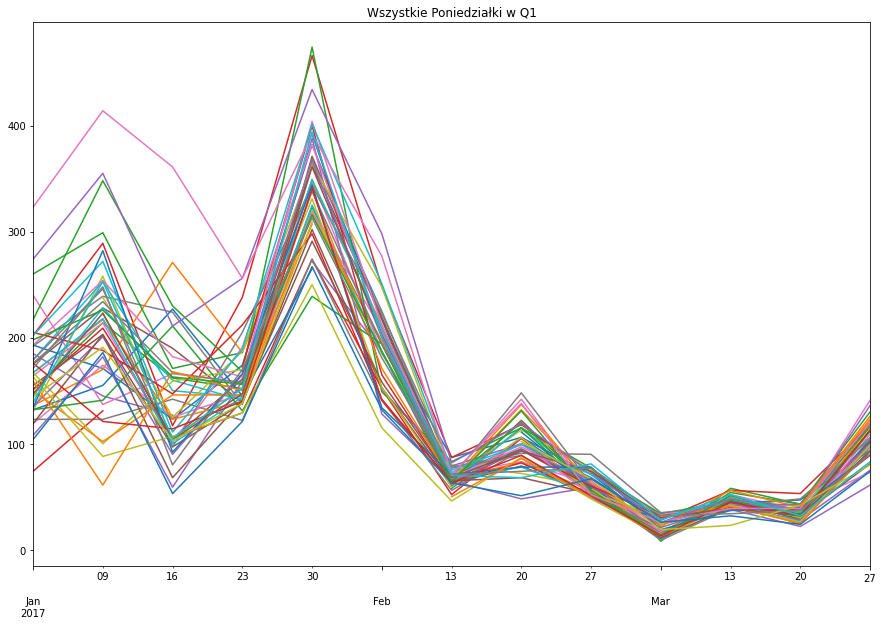

In [21]:
year[columns_pm10].loc[d1].plot(figsize=(15,10), legend=False, subplots=False)
plt.title("Wszystkie Poniedziałki w Q1")
plt.show()

In [22]:
d1 = pd.date_range("2017-04-01", "2017-06-30", freq="W-MON")
d1

DatetimeIndex(['2017-04-03', '2017-04-10', '2017-04-17', '2017-04-24',
               '2017-05-01', '2017-05-08', '2017-05-15', '2017-05-22',
               '2017-05-29', '2017-06-05', '2017-06-12', '2017-06-19',
               '2017-06-26'],
              dtype='datetime64[ns]', freq='W-MON')

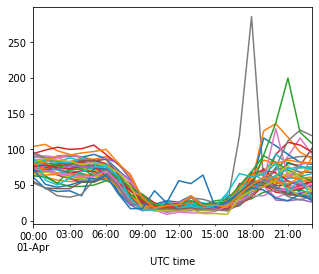

In [23]:
year[columns_pm10].loc['2017-04-01'].plot(figsize=(5,4), legend=False, subplots=False)

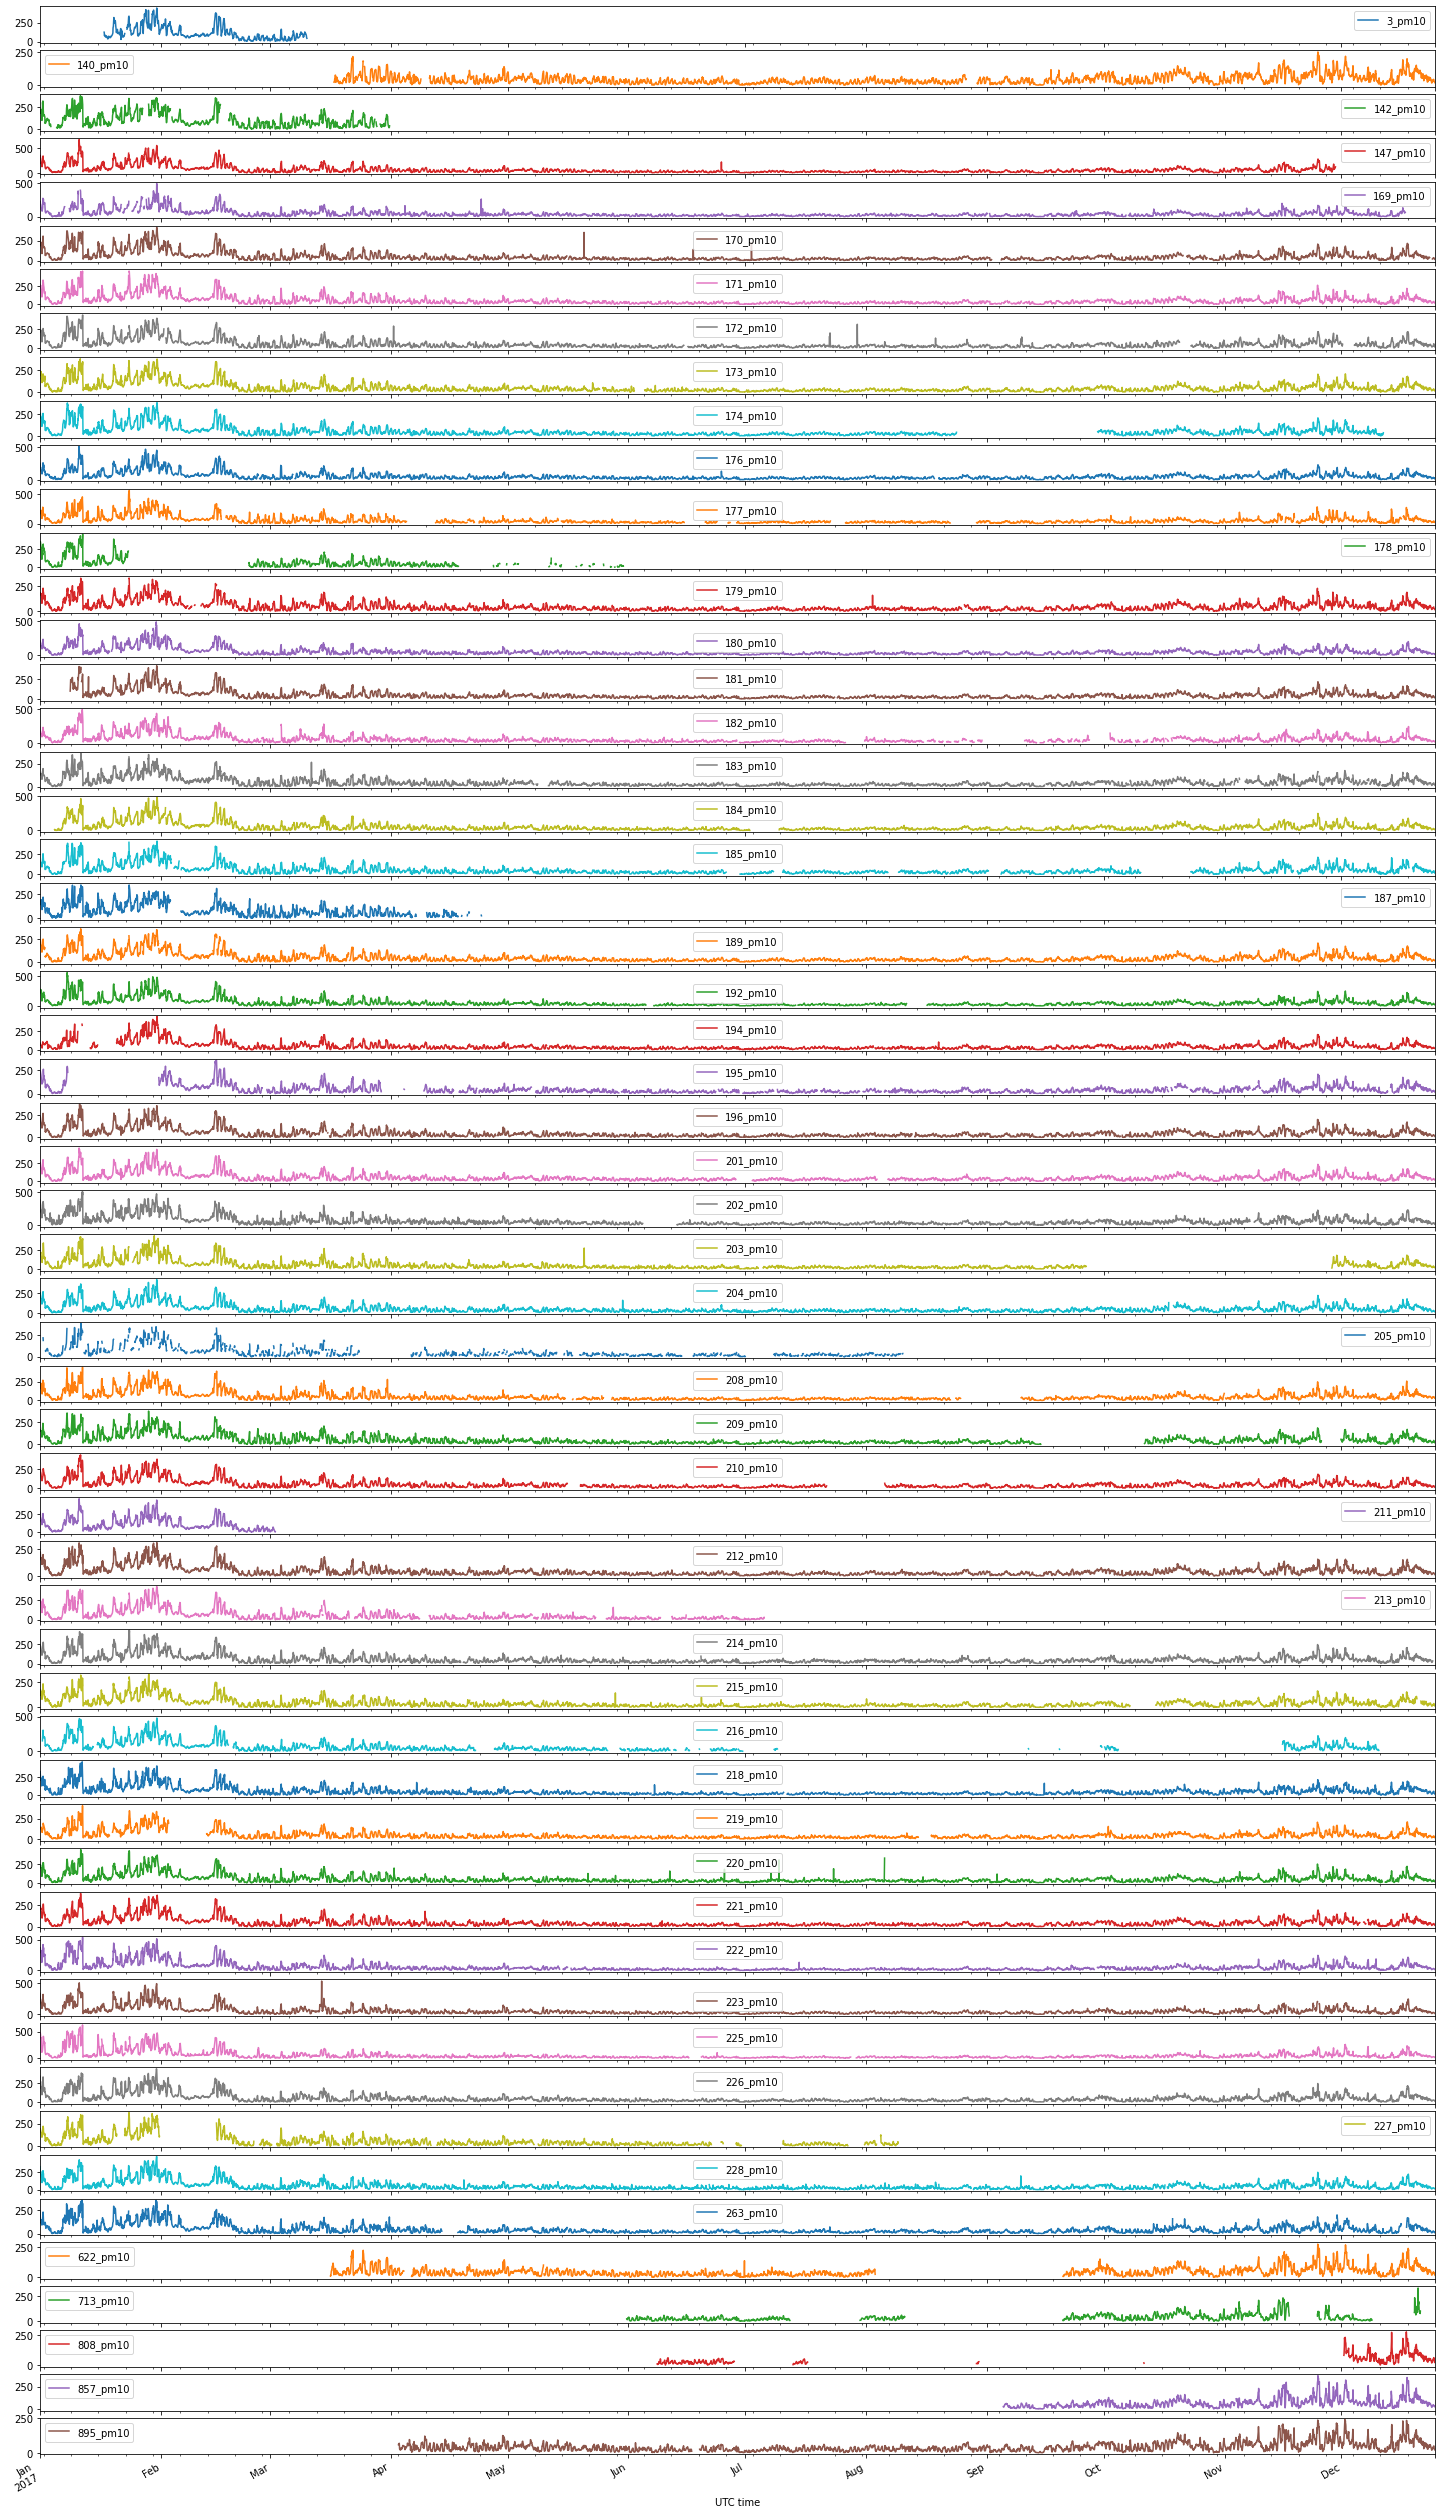

<Figure size 432x288 with 0 Axes>

In [24]:
year[columns_pm10].plot(figsize=(25,50), legend=True, subplots=True)
plt.show()
plt.savefig('time-series-pm10.png')

In [25]:
import pandas as pd

In [26]:
year_hour = [x for x in pd.date_range(start='2017-01-01', end="2017-12-31", freq="1H")  ]
len(year_hour)

8737

In [27]:
days = year[columns_pm10].groupby(pd.Grouper(freq='1D', origin='start')).mean()
days[:3]

,3_pm10,140_pm10,142_pm10,147_pm10,169_pm10,170_pm10,171_pm10,172_pm10,173_pm10,174_pm10,176_pm10,177_pm10,178_pm10,179_pm10,180_pm10,181_pm10,182_pm10,183_pm10,184_pm10,185_pm10,187_pm10,189_pm10,192_pm10,194_pm10,195_pm10,196_pm10,201_pm10,202_pm10,203_pm10,204_pm10,205_pm10,208_pm10,209_pm10,210_pm10,211_pm10,212_pm10,213_pm10,214_pm10,215_pm10,216_pm10,218_pm10,219_pm10,220_pm10,221_pm10,222_pm10,223_pm10,225_pm10,226_pm10,227_pm10,228_pm10,263_pm10,622_pm10,713_pm10,808_pm10,857_pm10,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,NaN,NaN,193.00,234.458333,164.833333,193.958333,217.791667,191.041667,172.875000,190.166667,172.500000,179.833333,242.375000,158.166667,153.333333,NaN,149.791667,135.750000,NaN,166.357143,151.791667,183.000000,201.125000,65.583333,170.875000,170.458333,186.166667,249.916667,185.666667,185.375000,200.000000,182.166667,150.375000,173.166667,177.791667,153.541667,195.958333,179.583333,146.833333,219.888889,206.541667,131.000000,202.750000,179.166667,273.583333,204.666667,300.375,213.125000,158.166667,202.625000,142.333333,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,109.75,133.416667,112.208333,105.708333,116.166667,107.333333,100.000000,105.875000,104.041667,101.250000,132.375000,99.541667,93.666667,NaN,95.375000,86.375000,NaN,99.000000,100.136364,98.130435,107.375000,85.083333,108.083333,98.708333,104.750000,136.166667,103.083333,97.458333,77.133333,98.291667,93.333333,109.583333,103.375000,87.000000,107.166667,105.875000,88.833333,124.166667,108.666667,90.416667,110.291667,103.041667,142.416667,102.541667,144.250,111.458333,95.125000,101.000000,88.583333,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,70.70,68.041667,46.750000,53.041667,54.375000,51.875000,47.708333,51.500000,55.416667,55.000000,52.208333,52.250000,45.708333,NaN,54.125000,39.458333,NaN,51.291667,52.166667,44.541667,55.291667,40.041667,50.916667,45.250000,48.666667,84.333333,50.375000,43.833333,33.352941,54.708333,44.791667,46.458333,50.583333,43.000000,46.291667,49.916667,47.708333,54.625000,56.958333,42.041667,57.666667,49.291667,65.541667,52.416667,52.625,49.250000,43.000000,48.791667,45.666667,NaN,NaN,NaN,NaN,NaN


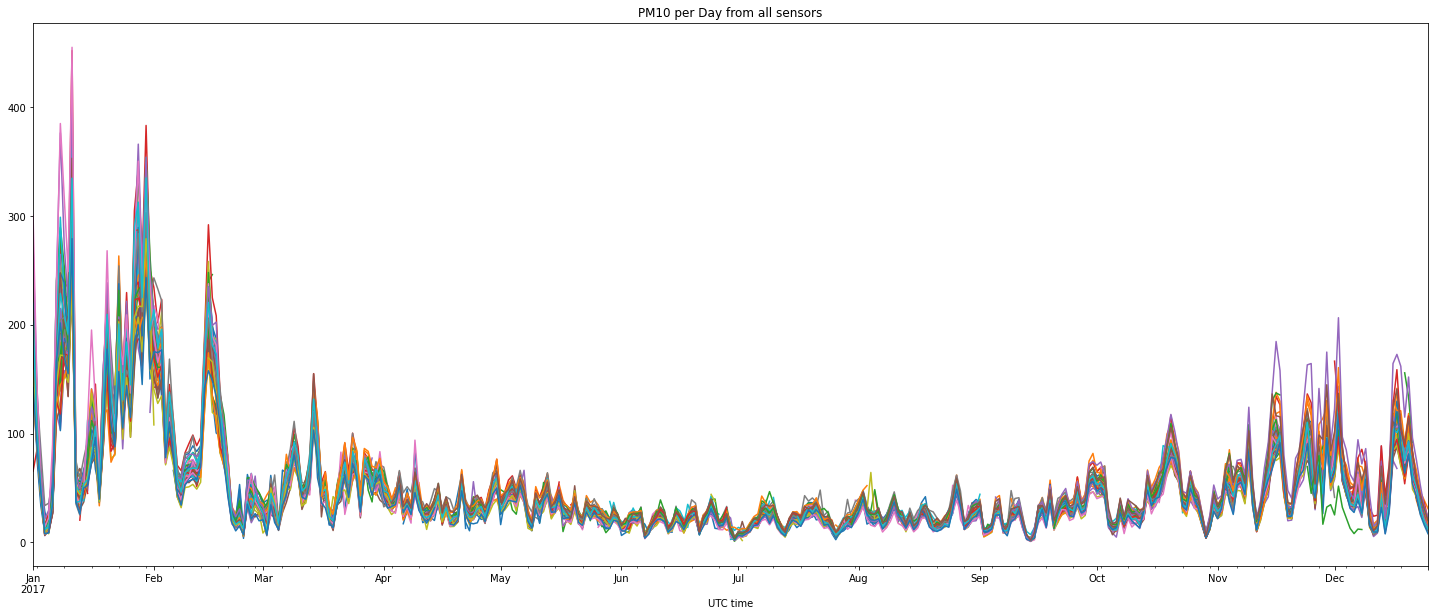

<Figure size 432x288 with 0 Axes>

In [28]:
days.plot(figsize=(25,10), legend=False, subplots=False)
plt.title("PM10 per Day from all sensors")
plt.show()
plt.savefig('PM10_per_Day_from_all_sensors.png')

In [29]:
week = year[columns_pm10].groupby(pd.Grouper(freq='W', origin='start')).mean()
week[:3]

,3_pm10,140_pm10,142_pm10,147_pm10,169_pm10,170_pm10,171_pm10,172_pm10,173_pm10,174_pm10,176_pm10,177_pm10,178_pm10,179_pm10,180_pm10,181_pm10,182_pm10,183_pm10,184_pm10,185_pm10,187_pm10,189_pm10,192_pm10,194_pm10,195_pm10,196_pm10,201_pm10,202_pm10,203_pm10,204_pm10,205_pm10,208_pm10,209_pm10,210_pm10,211_pm10,212_pm10,213_pm10,214_pm10,215_pm10,216_pm10,218_pm10,219_pm10,220_pm10,221_pm10,222_pm10,223_pm10,225_pm10,226_pm10,227_pm10,228_pm10,263_pm10,622_pm10,713_pm10,808_pm10,857_pm10,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,NaN,NaN,193.000000,234.458333,164.833333,193.958333,217.791667,191.041667,172.875000,190.166667,172.500000,179.833333,242.375000,158.166667,153.333333,NaN,149.791667,135.750000,NaN,166.357143,151.791667,183.000000,201.125000,65.583333,170.875000,170.458333,186.166667,249.916667,185.666667,185.375000,200.000000,182.166667,150.375000,173.166667,177.791667,153.541667,195.958333,179.583333,146.833333,219.888889,206.541667,131.000000,202.750000,179.166667,273.583333,204.666667,300.375000,213.125000,158.166667,202.625000,142.333333,NaN,NaN,NaN,NaN,NaN
2017-01-08,NaN,NaN,101.030075,105.315476,51.635036,90.851190,81.130952,98.898810,80.886905,95.333333,82.500000,85.869048,107.017857,68.226190,73.613095,191.333333,79.053571,70.101190,104.460784,82.393750,78.102410,74.709091,112.767857,69.352201,62.121622,68.702381,80.672619,110.416667,74.000000,71.976190,60.444444,79.797619,75.458333,71.464286,81.148810,58.696429,89.303571,79.511905,67.755952,106.047619,93.666667,65.446429,83.113095,65.083333,134.982143,90.916667,134.410714,84.416667,72.988095,86.952381,79.202381,NaN,NaN,NaN,NaN,NaN
2017-01-15,NaN,NaN,138.017857,169.720238,99.012821,131.482143,135.779762,137.750000,122.190476,123.785714,130.005952,148.464286,137.726190,106.940476,123.345238,132.218182,139.422619,116.982143,122.726190,135.095238,126.815476,111.863095,147.570552,112.662651,NaN,113.577381,126.107143,160.684524,128.732143,113.160714,118.980769,132.047619,125.404762,125.333333,125.333333,103.119048,127.375000,129.047619,101.583333,158.244755,141.732143,108.693252,135.083333,113.607143,168.714286,137.779762,180.148810,122.750000,114.142857,131.577381,110.101190,NaN,NaN,NaN,NaN,NaN


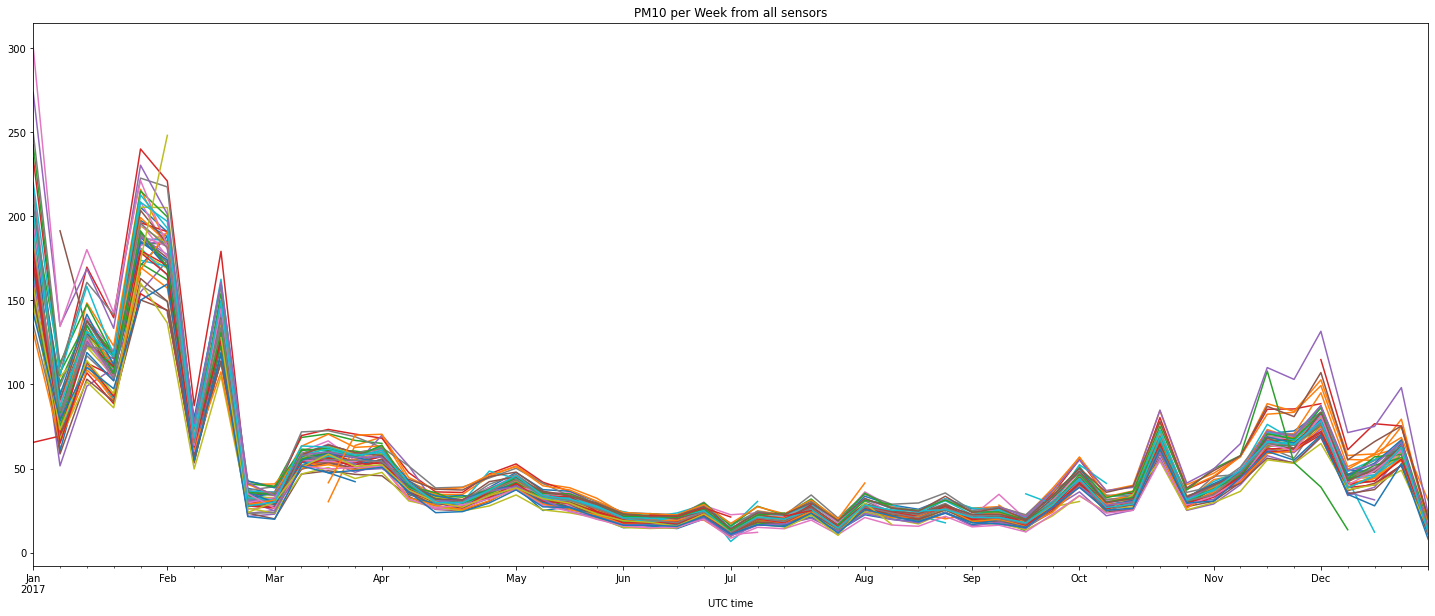

<Figure size 432x288 with 0 Axes>

In [30]:
week.plot(figsize=(25,10), legend=False, subplots=False)
plt.title("PM10 per Week from all sensors")
plt.show()
plt.savefig('PM10_per_Week_from_all_sensors.png')

In [31]:
months = year[columns_pm10].groupby(pd.Grouper(freq='1M', origin='start')).mean()
months[:3]

,3_pm10,140_pm10,142_pm10,147_pm10,169_pm10,170_pm10,171_pm10,172_pm10,173_pm10,174_pm10,176_pm10,177_pm10,178_pm10,179_pm10,180_pm10,181_pm10,182_pm10,183_pm10,184_pm10,185_pm10,187_pm10,189_pm10,192_pm10,194_pm10,195_pm10,196_pm10,201_pm10,202_pm10,203_pm10,204_pm10,205_pm10,208_pm10,209_pm10,210_pm10,211_pm10,212_pm10,213_pm10,214_pm10,215_pm10,216_pm10,218_pm10,219_pm10,220_pm10,221_pm10,222_pm10,223_pm10,225_pm10,226_pm10,227_pm10,228_pm10,263_pm10,622_pm10,713_pm10,808_pm10,857_pm10,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-31,178.758209,NaN,144.864865,175.748318,115.745253,140.780914,144.773890,143.294751,131.528226,137.084011,140.676075,152.628880,127.425688,112.752355,132.854195,151.828829,138.989189,118.909825,151.197248,138.320000,127.824798,121.054720,160.202977,138.404453,80.054348,118.127860,135.227456,169.368280,137.210818,123.608345,126.036939,140.702557,128.033602,131.196237,135.487214,108.882907,140.345895,135.245968,111.253028,157.668563,142.885753,117.680055,139.240915,123.418011,178.818304,147.088710,180.898352,140.586022,125.161103,147.278226,116.173620,NaN,NaN,NaN,NaN,NaN
2017-02-28,100.640835,NaN,91.428105,111.229167,79.041667,84.004464,90.244745,84.727685,84.238095,82.745536,94.522590,87.891135,36.387597,75.497453,85.368421,89.645833,88.468217,76.979167,98.138806,85.742138,78.478477,79.894900,94.781250,86.035714,89.483670,75.229167,90.830357,104.458333,86.011905,83.431548,79.739612,93.285714,86.233631,84.002976,88.602679,72.013393,82.925595,88.584821,67.403274,96.123053,89.846726,74.806378,84.864583,80.117560,101.850523,88.302083,90.101362,87.153274,65.121622,93.491071,76.195231,NaN,NaN,NaN,NaN,NaN
2017-03-31,50.541485,61.554252,62.778090,65.456989,47.107962,52.533602,56.854839,55.805108,50.059140,50.940860,57.410397,57.963710,52.905787,50.646505,48.186828,53.451962,54.384507,49.103774,53.801075,56.169355,53.335135,50.495879,55.946237,50.030914,51.016012,48.217753,54.030914,64.746972,55.365591,51.219086,43.730519,61.202957,57.198925,52.353495,25.000000,43.083333,51.950966,54.096774,43.861559,54.923387,52.663978,47.818548,55.125000,49.385753,54.474394,55.733696,47.298789,51.320704,50.748911,56.290323,45.512097,65.90566,NaN,NaN,NaN,NaN


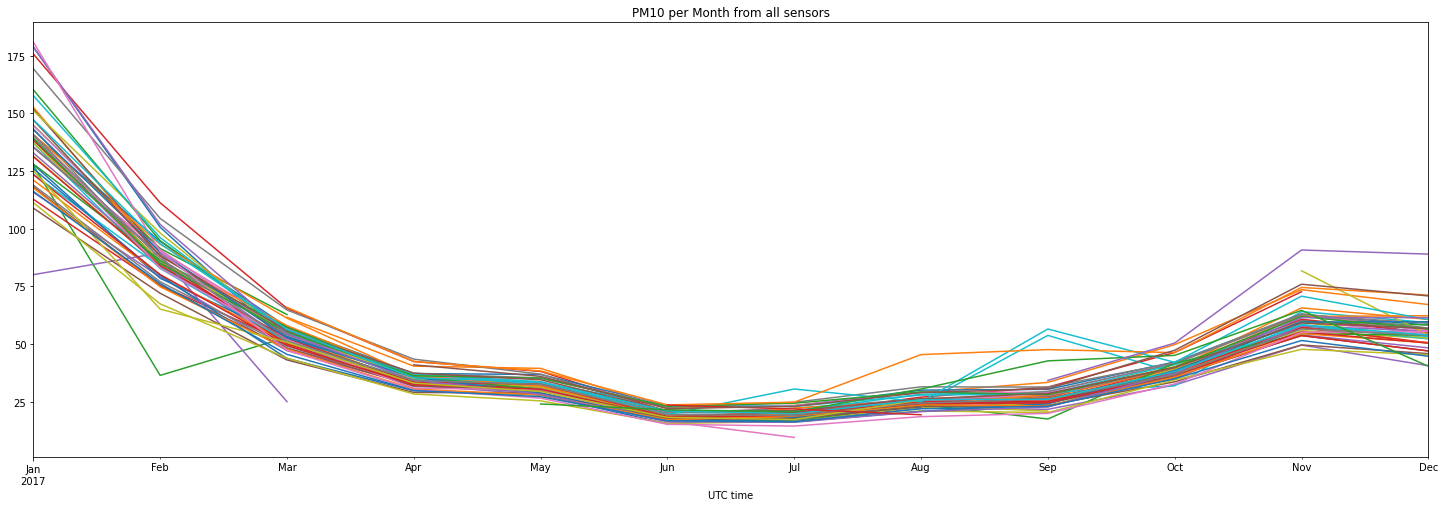

<Figure size 432x288 with 0 Axes>

In [32]:
months.plot(figsize=(25,8), legend=False, subplots=False)
plt.title("PM10 per Month from all sensors")
plt.show()
plt.savefig('PM10_per_Month_from_all_sensors.png')

In [33]:
quarter = year[columns_pm10].groupby(pd.Grouper(freq='Q', origin='start')).mean()
quarter[:3]

,3_pm10,140_pm10,142_pm10,147_pm10,169_pm10,170_pm10,171_pm10,172_pm10,173_pm10,174_pm10,176_pm10,177_pm10,178_pm10,179_pm10,180_pm10,181_pm10,182_pm10,183_pm10,184_pm10,185_pm10,187_pm10,189_pm10,192_pm10,194_pm10,195_pm10,196_pm10,201_pm10,202_pm10,203_pm10,204_pm10,205_pm10,208_pm10,209_pm10,210_pm10,211_pm10,212_pm10,213_pm10,214_pm10,215_pm10,216_pm10,218_pm10,219_pm10,220_pm10,221_pm10,222_pm10,223_pm10,225_pm10,226_pm10,227_pm10,228_pm10,263_pm10,622_pm10,713_pm10,808_pm10,857_pm10,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-31,112.540891,61.554252,99.061307,117.659565,78.813692,92.720833,97.524385,94.968343,88.754167,90.377437,97.892941,99.970395,80.063514,79.924855,88.579588,93.595117,94.762291,81.833565,98.967118,93.398575,87.111697,84.018993,103.808353,86.771867,70.882431,81.033708,93.427976,113.160259,92.616285,86.157480,85.899809,98.547939,90.630556,89.356944,111.151139,74.732283,93.374521,92.777778,74.381195,102.161321,95.308333,80.515486,93.329319,84.446759,112.079851,97.487454,106.188555,93.312761,83.917563,99.204167,79.381372,65.905660,NaN,NaN,NaN,NaN
2017-06-30,NaN,33.906015,NaN,33.805069,25.646330,26.686691,27.631144,29.812966,27.741874,28.071166,32.462104,29.232070,33.636054,27.417669,27.963252,29.803596,30.454759,26.044367,27.185491,30.543582,35.632836,26.643519,28.118365,27.477461,26.400219,26.729478,31.743747,35.072774,28.418090,30.325688,23.881553,28.860908,27.966483,28.121835,NaN,25.070280,26.001075,31.730181,23.121783,30.844858,27.193355,25.216092,31.526412,26.984382,26.255150,31.052342,24.330795,28.723932,27.483556,29.987980,24.352317,34.652686,21.510959,23.514706,NaN,33.072318
2017-09-30,NaN,28.459217,NaN,25.999547,20.216500,21.774779,21.951117,24.890810,21.169914,22.474436,27.753211,24.863942,NaN,23.246324,22.863678,24.695890,24.262976,21.201848,22.833996,25.964824,NaN,22.244982,21.759106,23.500460,22.396016,22.542831,27.133078,24.940047,21.139546,26.369565,19.388521,23.170826,20.690280,23.600216,NaN,21.284420,9.487179,29.130435,19.193388,39.500000,20.398445,21.831604,27.168483,22.574536,19.751952,25.197727,17.663577,23.147192,19.751724,23.855835,20.375510,31.244976,30.467662,21.448598,34.197092,27.466033


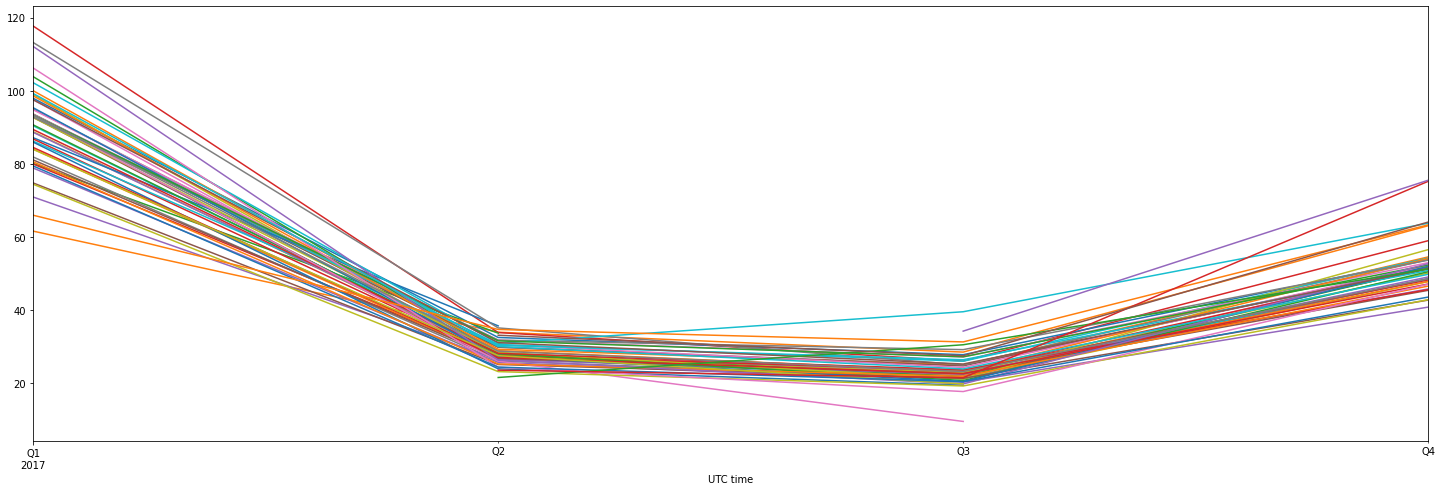

In [34]:
quarter.plot(figsize=(25,8), legend=False, subplots=False)
plt.show()

In [35]:
new_df = pd.DataFrame()

In [36]:
for i in year.groupby(year.columns.str.split('_').str[0], axis=1):
  old = i[1].columns
  new = i[1].columns.str.split("_").str[1]
  zmiana = { k:v  for k,v in zip(old,new)}
  i[1].rename(columns=zmiana,inplace=True)
  i[1]["id"] = i[0]
  new_df = new_df.append(i[1])
  # print(i[1])

In [37]:
new_df[:3]

,temperature,humidity,pressure,pm1,pm25,pm10,id
UTC time,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140


3.2 Połaczenie wartości z konkretnymi lokalizacjami wg ID sensoru

In [38]:
new_df["id"] = new_df["id"].astype(int)
sensors["id"] = sensors["id"].astype(int)

In [39]:
new_df = new_df.reset_index()

In [40]:
geo_df = new_df.merge(sensors, how='left', on='id')
geo_df[:3]

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374


4 EDA

In [41]:
geo_df.shape

(481208, 10)

4.1. Ile jest Nan w danych kolumnach

In [42]:
geo_df.isnull().sum()

UTC time            0
temperature    109558
humidity       109638
pressure       172529
pm1             92854
pm25            92835
pm10            92832
id                  0
latitude            0
longitude           0
dtype: int64

4.2. Czy można znaleźć brakujące dane lub czymś je zastąpić

In [43]:
geo_df = geo_df.dropna()
geo_df.shape

(291754, 10)

4.3 Sprawdzenie występowania p10 w dniu / tygodniu w dwóch odległuch od siebie punktach 

In [44]:
geo_df_analiza = geo_df.copy()
geo_df_analiza = geo_df_analiza.set_index("UTC time")
geo_df_analiza[:3]

,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
UTC time,,,,,,,,,
2017-03-17 11:00:00,12.0,44.0,101244.0,16.0,10.0,22.0,140,50.057747,19.961374
2017-03-17 12:00:00,12.0,45.0,101147.0,18.0,12.0,26.0,140,50.057747,19.961374
2017-03-17 13:00:00,12.0,43.0,101049.0,18.0,12.0,26.0,140,50.057747,19.961374


In [45]:
geo_df_analiza.loc["2017-01-16 00:00:00":"2017-01-22 00:00:00"]

,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
UTC time,,,,,,,,,
2017-01-16 00:00:00,-4.0,72.0,101616.0,96.0,103.0,162.0,142,50.084816,19.878066
2017-01-16 01:00:00,-4.0,72.0,101621.0,109.0,118.0,182.0,142,50.084816,19.878066
2017-01-16 02:00:00,-4.0,72.0,101612.0,80.0,85.0,139.0,142,50.084816,19.878066
2017-01-16 03:00:00,-4.0,71.0,101623.0,104.0,114.0,178.0,142,50.084816,19.878066
2017-01-16 04:00:00,-3.0,71.0,101635.0,100.0,109.0,173.0,142,50.084816,19.878066
...,...,...,...,...,...,...,...,...,...
2017-01-18 00:00:00,-5.0,73.0,101127.0,37.0,53.0,63.0,3,50.057748,19.961375
2017-01-18 01:00:00,-5.0,73.0,101138.0,38.0,54.0,65.0,3,50.057748,19.961375
2017-01-18 02:00:00,-5.0,71.0,101153.0,38.0,55.0,65.0,3,50.057748,19.961375


In [46]:
geo_df_analiza.id.unique()

array([140, 142, 147, 169, 170, 171, 172, 173, 174, 176, 177, 179, 180,
       181, 182, 183, 184, 185, 187, 189, 192, 194, 195, 196, 201, 202,
       204, 205, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219,
       220, 221, 222, 223, 225, 226, 227, 228, 263,   3, 622, 713, 808,
       857, 895])

4.4. Jakie zastosować normy i ich zakresy dla stężenia pm10 w celu określenia jakości powietrza

In [47]:
geo_df.pm10.describe([0.4,0.75, 0.9, 0.95,0.99])

count    291754.000000
mean         49.589233
std          53.379528
min          -1.000000
40%          26.000000
50%          34.000000
75%          61.000000
90%         102.000000
95%         154.000000
99%         282.000000
max         664.000000
Name: pm10, dtype: float64

Wnioski
> podejrzana wartość to `min = -1`. Poziom stężenia nie może być ujemny. Dane prawdopodobnie wymagają dalszego oczyszczenia. 

> niepokojąca jest też wartość `max=664` . Normy zaczynają sie od 25 a kończna na 150 .  Czy dla wartości powyżej 200 powinniśmy przyjąć własne normy ?

> Istotny jest fakt że 99% danych mieści się w zakresie od 0 do 282.  

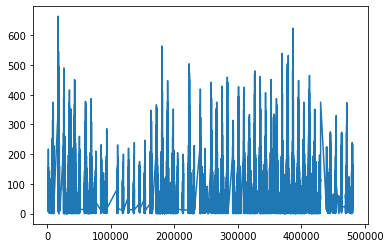

In [48]:
geo_df.pm10.plot()

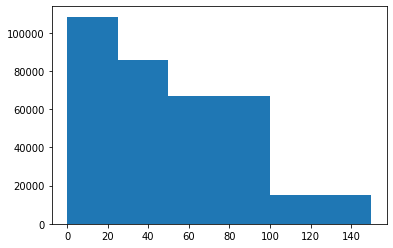

In [49]:
plt.hist(geo_df.pm10, bins=[0,25,50,100,150])
plt.show()

> przyjęte normy i ich zakresy to 50/100/150.   Na powyższym wykresie widać wartości powyżej 200 a nawet 600. Czy są tą błędy pomiarowe czy i dla nich zrobić klasyfikację. Poniżej sprawdzę zakresy dla konkretnej stacji. 

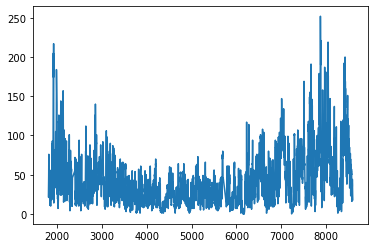

In [50]:
geo_df[geo_df["id"]==140].pm10.plot()

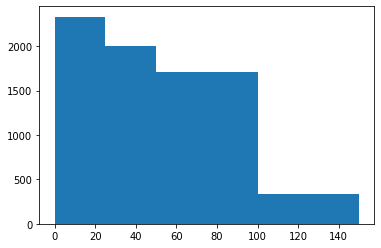

In [51]:
plt.hist(geo_df[geo_df["id"]==140].pm10, bins=[0,25,50,100,150])
plt.show()

Wnioski:
> Źródła zgodnie podają że stan powyżej 100 dla pm10 jest "alarmujący". Z uwagi że podaczas wysiku fizycznego na świerzym powietrzu pobiera się wiecej powietrza niż przy zwykłej aktywnośći uznaję że wszytkie pomiary powyżej 100 będą uznawane za szkodliwe dla zdrowia. 

> Zakresy dla PM10 które będę w dalszych krokach prowadziło to 0,25,50,100,150

5 Zmiana danych na kategoryczne - Rozbicie TimeSeries na dzień, miesiąc etc


In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
def parse_season(x):
    if x in [4,5,6,7,8,9]:
       return "lato"
    elif x in [1,2,3,10,11,12]:
       return "zima"
    else:
       return "bład"

In [54]:
def parse_hours(x):
    if x in [10,11,12,13,14,15,16]:
       return "dzien"
    elif x in [1,2,3,4,5,6,7,8,9,17,18,19,20,21,22,23,0]:
       return "noc"
    else:
       return "bład"

In [55]:
geo_df["season"] = geo_df["UTC time"].dt.month.apply(parse_season)
geo_df["part_of_the_day"] = geo_df["UTC time"].dt.hour.apply(parse_hours)
geo_df[:3]

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude,season,part_of_the_day
1811,2017-03-17 11:00:00,12.0,44.0,101244.0,16.0,10.0,22.0,140,50.057747,19.961374,zima,dzien
1812,2017-03-17 12:00:00,12.0,45.0,101147.0,18.0,12.0,26.0,140,50.057747,19.961374,zima,dzien
1813,2017-03-17 13:00:00,12.0,43.0,101049.0,18.0,12.0,26.0,140,50.057747,19.961374,zima,dzien


In [56]:
geo_df.shape

(291754, 12)

In [57]:
season = pd.get_dummies(geo_df["season"], prefix='season', drop_first=True)
hours = pd.get_dummies(geo_df["part_of_the_day"], prefix='hours', drop_first=True)
geo_df =  geo_df.join([season, hours])
geo_df[:3]

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude,season,part_of_the_day,season_zima,hours_noc
1811,2017-03-17 11:00:00,12.0,44.0,101244.0,16.0,10.0,22.0,140,50.057747,19.961374,zima,dzien,1,0
1812,2017-03-17 12:00:00,12.0,45.0,101147.0,18.0,12.0,26.0,140,50.057747,19.961374,zima,dzien,1,0
1813,2017-03-17 13:00:00,12.0,43.0,101049.0,18.0,12.0,26.0,140,50.057747,19.961374,zima,dzien,1,0


In [58]:
geo_df.shape

(291754, 14)

6 Normalizacja współrzędnych - Standard scaller lub wzór (-50x1000)

7 Predykcja - szukanie najlepszego modelu

7.1 Regression

In [59]:
X = geo_df[["latitude","longitude","season_zima","hours_noc"]]
X[:3]

,latitude,longitude,season_zima,hours_noc
1811,50.057747,19.961374,1,0
1812,50.057747,19.961374,1,0
1813,50.057747,19.961374,1,0


In [60]:
y = geo_df["pm10"]
y[:3]

1811    22.0
1812    26.0
1813    26.0
Name: pm10, dtype: float64

7.1.1 Regresja liniowa

In [61]:
from sklearn.linear_model import LinearRegression

7.1.1.2 Regresja liniowa Podstawowy model

In [62]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
#wygenerowanie danych do testowej predykcji
val_1812 = geo_df[["latitude","longitude","season_zima","hours_noc"]].iloc[1812].values
df_predict = pd.DataFrame([val_1812], columns=["latitude","longitude","season_zima","hours_noc"])
df_predict

,latitude,longitude,season_zima,hours_noc
0,50.057747,19.961374,0.0,0.0


In [64]:
#przewidziało
prediction = model.predict(df_predict)
prediction

array([13.31758695])

In [65]:
#powinno być
geo_df["pm10"].loc[1812]

26.0

7.1.1.3 Regresja liniowa - Dostrajanie modelu np grid search

7.1.2.1 RandomForestRegressor()

In [66]:
from sklearn.ensemble import RandomForestRegressor

7.1.2.2 RandomForestRegressor() - Podstawowy model

In [67]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
#wygenerowanie danych do testowej predykcji
val_1812 = geo_df[["latitude","longitude","season_zima","hours_noc"]].iloc[1812].values
df_predict = pd.DataFrame([val_1812], columns=["latitude","longitude","season_zima","hours_noc"])
df_predict

,latitude,longitude,season_zima,hours_noc
0,50.057747,19.961374,0.0,0.0


In [69]:
#przewidziało
prediction = model.predict(df_predict)
prediction

array([21.04539275])

In [70]:
#powinno być
geo_df["pm10"].loc[1812]

26.0

7.1.2.3 RandomForestRegressor() - Dostrajanie modelu np grid search

In [71]:
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [72]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [2,5,10,50,100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    }

In [73]:
from sklearn.model_selection import GridSearchCV

model=RandomForestRegressor()
grid_search  = GridSearchCV(model, param_grid, cv=3, n_jobs = -1, verbose = 10)
grid_search .fit(X, y)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  8

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [74]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_split': 5}

In [75]:
model = RandomForestRegressor(**grid_search.best_params_)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [76]:
#wygenerowanie danych do testowej predykcji
val_1812 = geo_df[["latitude","longitude","season_zima","hours_noc"]].iloc[1812].values
df_predict = pd.DataFrame([val_1812], columns=["latitude","longitude","season_zima","hours_noc"])
df_predict

,latitude,longitude,season_zima,hours_noc
0,50.057747,19.961374,0.0,0.0


In [77]:
#przewidziało
prediction = model.predict(df_predict)
prediction

array([18.76436787])

In [78]:
#powinno być
geo_df["pm10"].loc[1812]

26.0

7.2 Predykcja TimeSeries

7.2.1 arima (pmd arima auto-arima)

7.2.2 Profet

7.3 RNN

7.3.1 LSTM

7.3.1.1 LSTM - Podstawowy

In [79]:
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2]), batch_input_shape=(24, train_X.shape[1], train_X.shape[2]), return_sequences=True, stateful=True))  # trzeba to sprawdzić
# model.add(LSTM(50, return_sequences=False))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam', metrics=['mae', 'acc'])
# # fit network
# history = model.fit(train_X, train_Y, epochs=58, batch_size=24, validation_data=(test_X, test_Y), verbose=2, shuffle=False) # dodać callback

7.3.1.2 LSTM - Dwukierunkowy

7.3.2 GRU

7.3.2.1 GRU - Podstawowy

7.3.2.2 GRU - Dwukierunkowy

8 Zestawienie wyników predykcji - wybranie najlepszego modelu do predykcji 

9 Obliczenie predykcji dla nowej daty dla wszystkich punktów pomiarowych 

10 Prototyp

10.1 Utworzenie siatki punktów w na terenie całego krakowa zlokalizowanych co 500m

In [80]:
left_top_corner =  [50.107 ,19.82]

points = pd.DataFrame()

for i in range(45):
  id_i = str(i+1) 
  i = i * 0.00463  # im mniejsza wartość tym bliższe odległości od kolejnego punktu
  for x in range(35):
    id = id_i + "-" + str(x+1)
    x = x * 0.00297      # im mniejsza wartość tym bliższe odległości od kolejnego punktu
    lat = left_top_corner[0] - x
    lon = left_top_corner[1] + i
    pm10= 0
    points = points.append({"id":id,"Latitude":lat,"Longitude":lon,"PM10":pm10},ignore_index=True)

points

,Latitude,Longitude,PM10,id
0,50.10700,19.82000,0.0,1-1
1,50.10403,19.82000,0.0,1-2
2,50.10106,19.82000,0.0,1-3
3,50.09809,19.82000,0.0,1-4
4,50.09512,19.82000,0.0,1-5
...,...,...,...,...
1570,50.01790,20.02372,0.0,45-31
1571,50.01493,20.02372,0.0,45-32
1572,50.01196,20.02372,0.0,45-33
1573,50.00899,20.02372,0.0,45-34


10.2 Obliczenie predykcji dla wszystkich stacji pomiarowych dla konkretnej daty

In [81]:
#wygenerowanie danych do testowej predykcji
val_1812 = geo_df[["latitude","longitude","season_zima","hours_noc"]].iloc[1812].values
df_predict = pd.DataFrame([val_1812], columns=["latitude","longitude","season_zima","hours_noc"])
df_predict

,latitude,longitude,season_zima,hours_noc
0,50.057747,19.961374,0.0,0.0


In [82]:
ds

NameError: ignored

In [ ]:
######## trzeba zamienic na ONEHOTENKODER BO getdummies  za kazdym razem inaczej przekształaca !!!!!!!!!!!!!!11

points["season"] = df_predict["M"].apply(parse_season)
points["part_of_the_day"] = df_predict["H"].apply(parse_hours)

season = pd.get_dummies(points["season"], prefix='season', drop_first=True)
hours = pd.get_dummies(points["part_of_the_day"], prefix='hours', drop_first=True)
points =  points.join([season, hours])

points[:3]

In [ ]:
points = points[["temperature",	"humidity","pressure","Latitude","Longitude","M","D",	"H"]]
points[:3]

In [ ]:
#przewidziało
prediction = model.predict(points)
prediction

In [ ]:
points["prediction_pm10"] = prediction
points[:3]

In [ ]:
points.describe()

In [ ]:
!pip -q install folium
import folium

In [ ]:
location = [50.0614 ,19.9366]

m = folium.Map(location=location, zoom_start=17)


for ind in points.index: 
    tooltip_txt = 'PM10:' + str(points['prediction_pm10'][ind])
    
    if points['prediction_pm10'][ind] <= 7:
      color="green",
    elif (points['prediction_pm10'][ind] > 7) & (points['prediction_pm10'][ind] <= 9):
      color="orange",
    elif (points['prediction_pm10'][ind] > 9) & (points['prediction_pm10'][ind] <= 10):
      color="red",
    elif (points['prediction_pm10'][ind] > 10):
      color="black",
    else:
      color="white"

    folium.Circle(
          location=[float(points['Latitude'][ind]), float(points['Longitude'][ind])], 
          radius=165,
          # popup="Laurelhurst Park",
          # fill=True,
          # fill_color="#3186cc",
          fill_color=color,
          color=color,
          tooltip= tooltip_txt
      ).add_to(m)
m

> zastanawiam się czy model nie został przeuczony dla  wartości z małym stężeniem. Sprawdziłem proporacje w zbiorze i 40% wartości dla pm10 sa z zakresu 0-26.   Może trzeba pomyśleć o upsample/downsample . Nie pamiętam czy przy predykcji można ją stosować.    Co myślicie ?  Skoro ustalimy wcześniej zakrsy to może przerzucić się na klasyfikacje a nie regresję ?

> aby upewnić się trzeba zastosować predykcję dla dnia w którym na pewno było wysokie stęrzenie pm10

In [ ]:
name_file = "index.html"

m.save(name_file)
from google.colab import files
files.download(name_file) 

10.3 Utworzenie modelu K-najbliższych sąsiadów -regression (odległość, haversine distance- odległość km )